63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
========== PERFORMANCE RESULTS ==========
Input SNR:  4.07 dB

Moving Average Output SNR:  10.82 dB
DNN Output SNR:  6.51 dB

Moving Average MSE:  0.0518
DNN MSE:  0.1395


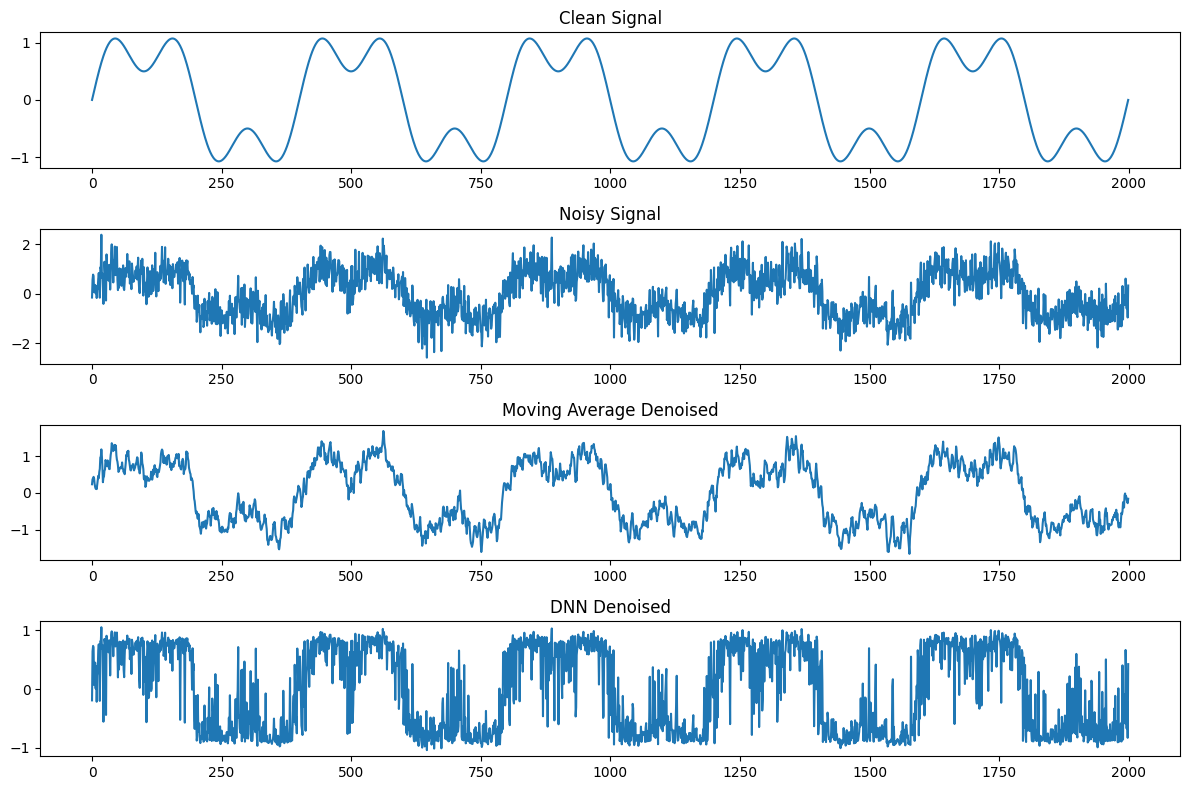

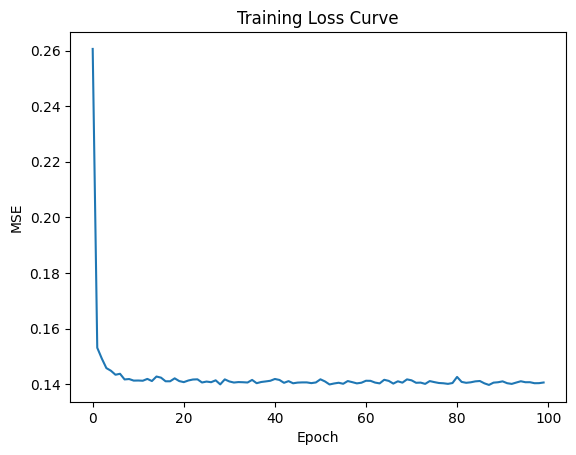


Project Completed Successfully.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

samples = 2000
t = np.linspace(0, 1, samples)

clean_signal = np.sin(2*np.pi*5*t) + 0.5*np.sin(2*np.pi*15*t)

noise_std = 0.5
noise = np.random.normal(0, noise_std, samples)
noisy_signal = clean_signal + noise

def compute_snr(signal, noise):
    signal_power = np.mean(signal**2)
    noise_power = np.mean(noise**2)
    return 10 * np.log10(signal_power / noise_power)

input_snr = compute_snr(clean_signal, noise)

def moving_average(signal, window_size=5):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='same')

ma_denoised = moving_average(noisy_signal)

X = noisy_signal.reshape(-1,1)
Y = clean_signal.reshape(-1,1)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(1,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

history = model.fit(X, Y, epochs=100, batch_size=32, verbose=0)

dnn_denoised = model.predict(X).flatten()

dnn_noise = clean_signal - dnn_denoised
ma_noise = clean_signal - ma_denoised

output_snr_dnn = compute_snr(clean_signal, dnn_noise)
output_snr_ma = compute_snr(clean_signal, ma_noise)

mse_dnn = np.mean((clean_signal - dnn_denoised)**2)
mse_ma = np.mean((clean_signal - ma_denoised)**2)

print("========== PERFORMANCE RESULTS ==========")
print("Input SNR: ", round(input_snr,2), "dB")
print("\nMoving Average Output SNR: ", round(output_snr_ma,2), "dB")
print("DNN Output SNR: ", round(output_snr_dnn,2), "dB")

print("\nMoving Average MSE: ", round(mse_ma,4))
print("DNN MSE: ", round(mse_dnn,4))

plt.figure(figsize=(12,8))

plt.subplot(4,1,1)
plt.title("Clean Signal")
plt.plot(clean_signal)

plt.subplot(4,1,2)
plt.title("Noisy Signal")
plt.plot(noisy_signal)

plt.subplot(4,1,3)
plt.title("Moving Average Denoised")
plt.plot(ma_denoised)

plt.subplot(4,1,4)
plt.title("DNN Denoised")
plt.plot(dnn_denoised)

plt.tight_layout()
plt.show()

plt.plot(history.history['loss'])
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

print("\nProject Completed Successfully.")
